# Explore and Clean the data

We will use [google play store](https://www.kaggle.com/lava18/google-play-store-apps) data set

### Import libraries and Load the data

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
apps = pd.read_csv('apps_ratings.csv')

### Data Exploration and Cleaning 

In [3]:
# let's see how the data looks like

apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000.0,Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000.0,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [4]:
print(f'The shape of the data set is: {apps.shape} \n')
print(f'number of examples: {apps.shape[0]}')
print(f'number of features: {apps.shape[1]-1}')


The shape of the data set is: (9659, 13) 

number of examples: 9659
number of features: 12


In [5]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

we will remove 'App', 'Current Ver', 'Android Ver' beacuse it's not halpful to our prediction 
<br> 

In [6]:
apps.drop(['App','Current Ver', 'Android Ver'], axis=1, inplace=True)

In [7]:
# checking if we have missing values

total = apps.isnull().sum().sort_values(ascending=False)
percent = (apps.isnull().sum()/apps.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total missing values', 'Percent'])
missing_data[missing_data['Percent'] > 0]


,Total missing values,Percent
Rating,1463,0.151465
Size,1227,0.127032
Type,1,0.000104


### Rating

In [8]:
apps['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

removing all rows with na in 'Rating' col <br> This is the label we are trying to predict, filling missing values will make the models baised.

In [9]:
apps.drop(index=apps[apps['Rating'].isna()].index,inplace=True,axis=1)

Lable exploration

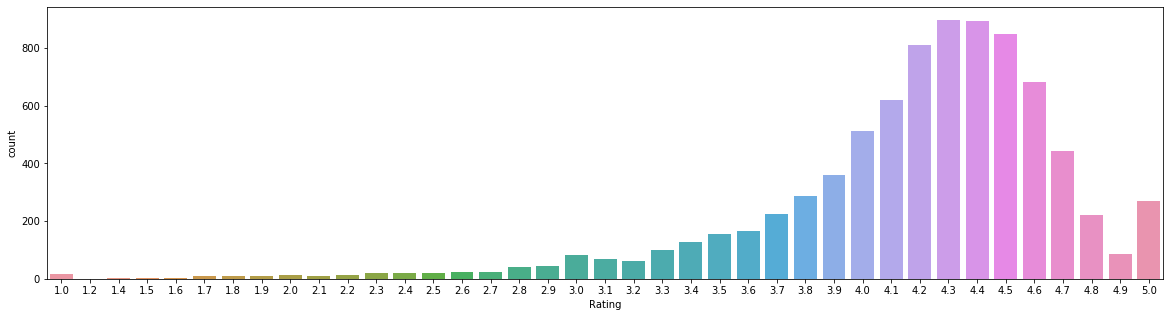

In [10]:
plt.figure(figsize=(20, 5))
sns.countplot(apps['Rating'])

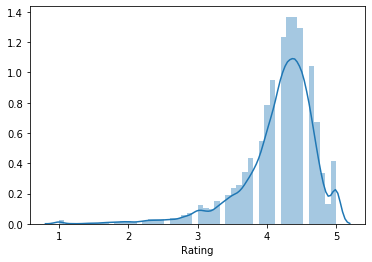

In [11]:
sns.distplot(apps['Rating'])

### Size

In [12]:
apps['Size'].describe()

count    7027.000000
mean       21.754427
std        22.726503
min         0.008500
25%         4.900000
50%        13.000000
75%        31.000000
max       100.000000
Name: Size, dtype: float64

In [13]:
#fill missing values with mean

mean = apps['Size'].mean()
apps['Size'].fillna(mean,inplace=True)

### Type

In [14]:
apps['Type'].value_counts(dropna=False)

Free    7592
Paid     604
Name: Type, dtype: int64

Beacuse we have also price column the Type feature is not usful. <br> if price > 0 then Type is Paid
Otherwise Type is Free

In [15]:
# creating dummy features for type col

# apps[['Type_Free', "Type_Paid"]] = pd.get_dummies(apps['Type'])


In [16]:
apps.drop('Type', inplace=True, axis=1)

### Category

In [17]:
apps['Category'].value_counts().head()

FAMILY       1608
GAME          912
TOOLS         718
FINANCE       302
LIFESTYLE     301
Name: Category, dtype: int64

In [18]:
apps['Category'].value_counts().tail()

ART_AND_DESIGN    61
COMICS            54
PARENTING         50
EVENTS            45
BEAUTY            42
Name: Category, dtype: int64

In [19]:
# creating dummy features for Category col

cat_dum = pd.get_dummies(apps['Category'], prefix='Category')
apps = pd.concat([apps, cat_dum],axis=1)
apps.drop('Category', inplace=True, axis=1)

### Reviews

In [20]:
apps['Reviews'].describe()

count    8.196000e+03
mean     2.552515e+05
std      1.985594e+06
min      1.000000e+00
25%      1.260000e+02
50%      3.004000e+03
75%      4.381300e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### Content Rating	

In [21]:
apps['Content Rating'].value_counts()

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [22]:
# creating dummy featurs for Cintent Rating col

content_dum = pd.get_dummies(apps['Content Rating'], prefix='Content Rating')
apps = pd.concat([apps, content_dum],axis=1)
apps.drop('Content Rating', inplace=True,axis=1)


### Genres

In [23]:
genres = apps['Genres']


In [24]:
apps['Genres'].value_counts().head(15)

Tools               717
Entertainment       471
Education           429
Finance             302
Productivity        301
Lifestyle           300
Personalization     298
Action              292
Medical             290
Sports              266
Photography         263
Business            263
Communication       256
Health & Fitness    244
News & Magazines    204
Name: Genres, dtype: int64

In [25]:
apps['Genres'].value_counts().tail(10)

Strategy;Education                   1
Lifestyle;Education                  1
Communication;Creativity             1
Racing;Pretend Play                  1
Adventure;Brain Games                1
Board;Pretend Play                   1
Music & Audio;Music & Video          1
Tools;Education                      1
Travel & Local;Action & Adventure    1
Comics;Creativity                    1
Name: Genres, dtype: int64

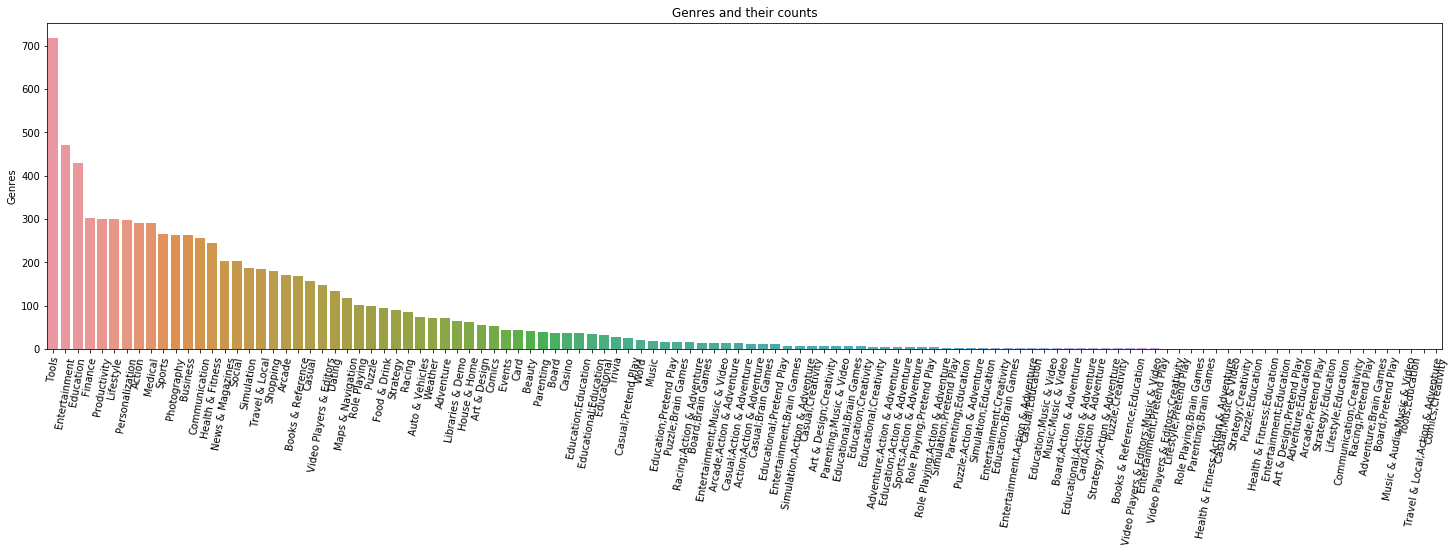

In [26]:
plt.figure(figsize=(25,6))
sns.barplot(x=genres.value_counts().index,y=genres.value_counts())
plt.xticks(rotation=80)
plt.title("Genres and their counts")
plt.show()

We have a lot of apps with more then one genre

In [27]:
# check how many genres each app have

genres.str.count(';').value_counts()

0    7817
1     379
Name: Genres, dtype: int64

the max genres each app have is 2 <br>Now we should split the genres and convert tham to dummy featurs

In [28]:
# Splitting the geners

g1 = genres.str.split(';').str[0]
g2 = genres.str.split(';').str[1]

# Creating dummies featurs from the genres

g1 = pd.get_dummies(g1, prefix='Genres')
g2 = pd.get_dummies(g2, prefix='Genres')

# Combining all to one datafarme

genres = pd.concat([g1, g2], axis = 1)
genres = genres.groupby(level=0, axis=1).sum()


In [29]:
def show_genres_dist(genres,table=False,table_head=5):
    # the func will halp us see the distrbution of genres
    
    name = pd.Series(genres.columns)
    values = []
    for col_name in genres.columns:
        values.append(genres[col_name].value_counts()[1])
    values=pd.Series(values)
    df = pd.concat([name,values], axis=1, keys=['Genre','Total'])
    df = df.sort_values(by=['Total'], ascending=False)
    if table:
        print(df.head(table_head))
    else:
        # plot table of distrebution
        plt.figure(figsize=(25,15))
        sns.barplot(x=df['Genre'],y=df['Total'])
        plt.xticks(rotation=80)
        plt.title("Genres and their counts")
        plt.show()


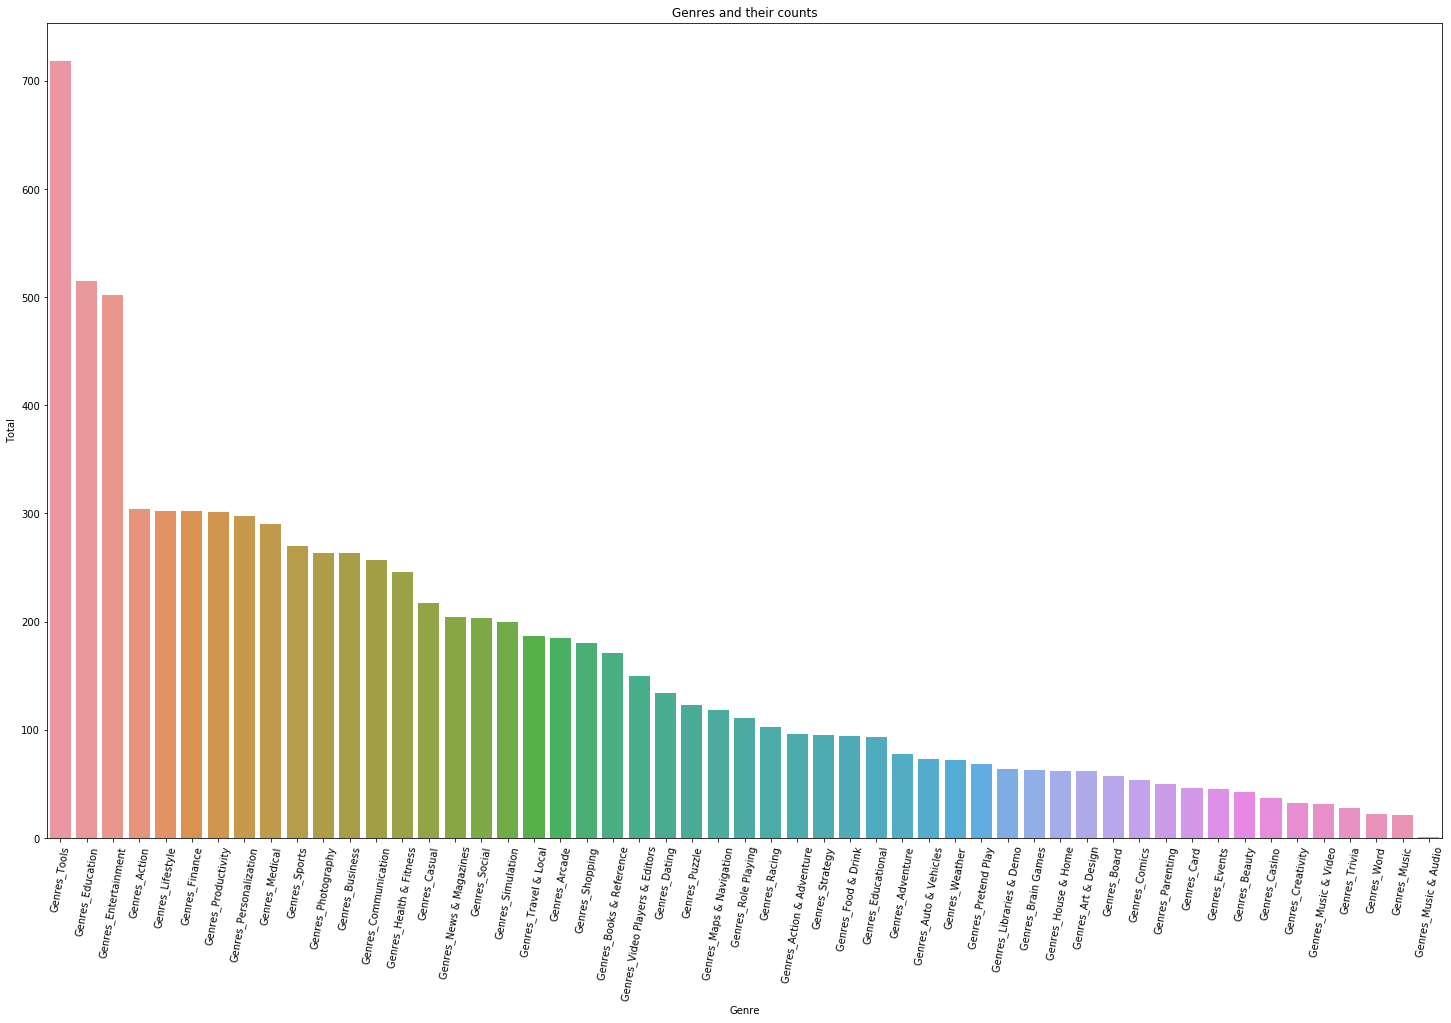

In [30]:
show_genres_dist(genres)

In [31]:
# find all the genres that have less then N samples in the dataset

N = 50
for col_name in genres.columns:
    if genres[col_name].value_counts()[1] < N: 
        print(f'{col_name} genre has only {genres[col_name].value_counts()[1]} appearnce')

Genres_Beauty genre has only 42 appearnce
Genres_Card genre has only 46 appearnce
Genres_Casino genre has only 37 appearnce
Genres_Creativity genre has only 32 appearnce
Genres_Events genre has only 45 appearnce
Genres_Music genre has only 21 appearnce
Genres_Music & Audio genre has only 1 appearnce
Genres_Music & Video genre has only 31 appearnce
Genres_Trivia genre has only 28 appearnce
Genres_Word genre has only 22 appearnce


In [32]:
# finding all columns with Music in it

m = pd.Series(genres.columns)
m[m.str.contains('Music')]

30            Genres_Music
31    Genres_Music & Audio
32    Genres_Music & Video
dtype: object

we can see we have 3 columns with Music in it. we will combine tham together

In [33]:

genres['Genres_Music'][genres['Genres_Music & Audio'] == 1] = 1

genres['Genres_Music'][(genres['Genres_Music & Video'] == 1) & (genres['Genres_Music'] != 1)] = 1

# removing 'Genres_Music & Audio' and 'Genres_Music & Video'

genres.drop(['Genres_Music & Audio', 'Genres_Music & Video'], axis=1, inplace=True)

In [34]:
apps = pd.concat([apps, genres],axis=1)
apps.drop('Genres', inplace=True,axis=1)

## Last Updated

In [35]:
lu = apps['Last Updated']

In [36]:
lu.head()

0     7-Jan-18
1    15-Jan-18
2     1-Aug-18
3     8-Jun-18
4    20-Jun-18
Name: Last Updated, dtype: object

In [37]:
lu = pd.to_datetime(lu)

In [38]:
year = lu.dt.year
month = lu.dt.month
# day = lu.dt.day
# lu = pd.concat([year, month],keys=['Updated_year', 'Updated_month'], axis=1)
lu = pd.concat([year],keys=['Updated_year'], axis=1)

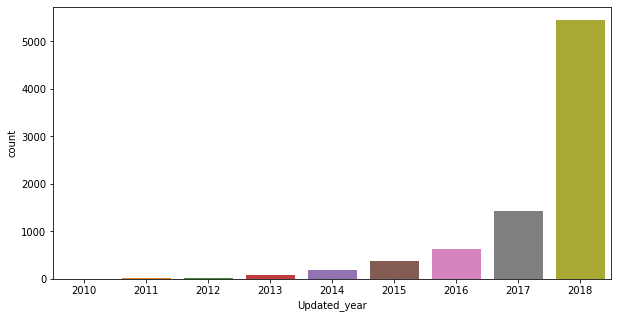

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(lu['Updated_year'])

In [40]:
# plt.figure(figsize=(10, 5))
# sns.countplot(lu['Updated_month'])

In [41]:
apps = pd.concat([apps, lu],axis=1)
apps.drop('Last Updated',axis=1,inplace=True)

### Price

In [42]:
apps['Price'].describe()

count    8196.000000
mean        1.037884
std        16.857882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### Installs

In [43]:
apps['Installs'].describe()

count    8.196000e+03
mean     9.165090e+06
std      5.825087e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [44]:
apps.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Updated_year
0,4.1,159,19.0,10000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
1,3.9,967,14.0,500000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
2,4.7,87510,8.7,5000000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
3,4.5,215644,25.0,50000000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
4,4.3,967,2.8,100000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018


In [45]:
apps.shape

(8196, 96)

finally we will save the file with the new features

In [46]:
apps.to_csv('apps_clean.csv',index=False)